In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from kinetic_function import (fit_function,
                              read_csv_file, 
                              single_track_analysis,
                              autocorrelation,
                              fit_autocorrelation,
                             )

In [2]:
prot_aa_size = {
    "32xsuntag": 796,  #768/32=24 , left 28
    "linker": 4,
    "twist": 490,
    "ilp4": 134,
    "snail": 390
}

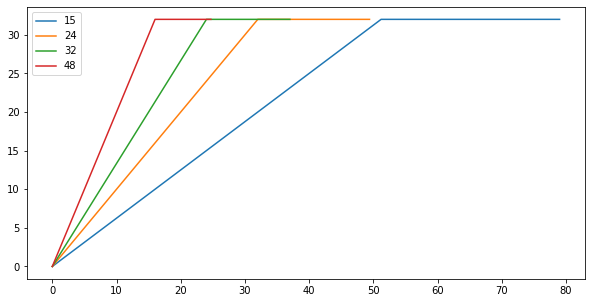

In [3]:
# Translation profil for one protein

prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
suntag_appearance = 24

fluo_max = 32

fig, ax = plt.subplots()

translation_rate = 15 #(aa/s)
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x
y[y>fluo_max]=fluo_max
ax.plot(x, y, label=translation_rate)

translation_rate = 24 #(aa/s)
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x
y[y>fluo_max]=fluo_max
ax.plot(x, y, label=translation_rate)

translation_rate = 32 #(aa/s)
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x
y[y>fluo_max]=fluo_max
ax.plot(x, y, label=translation_rate)

translation_rate = 48 #(aa/s)
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x
y[y>fluo_max]=fluo_max
ax.plot(x, y, label=translation_rate)



plt.legend(loc="upper left")
fig.set_size_inches((10, 5))

In [4]:
prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
suntag_appearance = 24

fluo_max = 32


translation_rate = 20 #(aa/s)
x = np.arange(prot_length/translation_rate, step=0.1, )
y = translation_rate/translation_rate*x
y[y>fluo_max]=fluo_max


In [5]:
# global signal
x_global = np.arange(4000, step=0.1)
y_global = np.zeros(len(x_global))

binding_rate = 0.05

for i in range(len(x_global)):
    # random number between 0 and 1
    n_rand = np.random.rand() 
    if n_rand < binding_rate:
        if i > (len(x_global)-len(x)):
            y_global[i:i+len(x)] += y[:len(y_global[i:i+len(x)])]
        else:
            y_global[i:i+len(x)] += y

x_global = x_global[2000:] - 200
y_global = y_global[2000:]
y_global -= np.min(y_global)


Text(0, 0.5, 'fluo intensity')

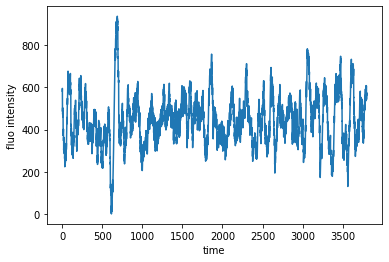

In [6]:
fig, ax = plt.subplots(1,1)
ax.plot(x_global, y_global)
ax.set_xlabel("time")
ax.set_ylabel("fluo intensity")

In [17]:
PROTEIN_SIZE = prot_length
DELTA_T = 0.4

xx = x_global[::4][-3000:-1000]-2600
yy = y_global[::4][-3000:-1000]
x_auto, y_auto = autocorrelation(yy, DELTA_T, True, mm=12)
elongation_r, translation_init_r = fit_autocorrelation(x_auto, y_auto, fit_function, protein_size=PROTEIN_SIZE)

print(elongation_r, translation_init_r)

35.476191059437134 0.4358286314696976


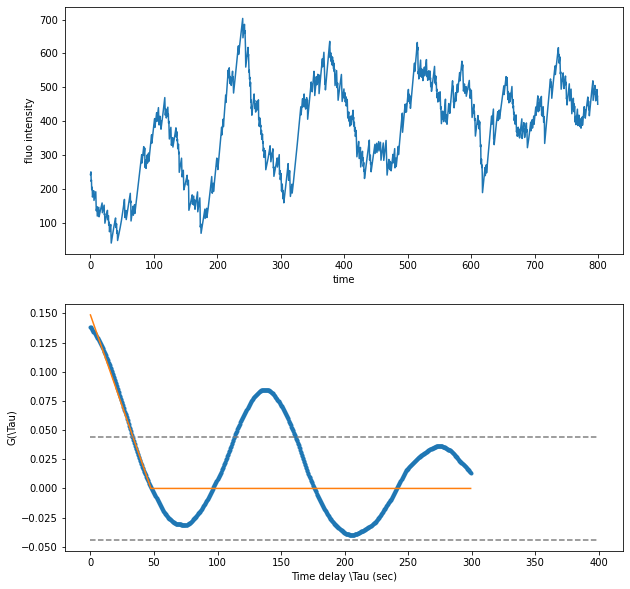

In [81]:
fig, ax = plt.subplots(2,1)
ax[0].plot(xx, yy)
ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")

ax[1].plot(x_auto[:int(len(x_auto)/2)], y_auto[:int(len(x_auto)/2)], '.')
ax[1].plot(x_auto[:int(len(x_auto)/2)], 
           fit_function(x_auto, PROTEIN_SIZE/elongation_r, translation_init_r)[:int(len(x_auto)/2)] )
ax[1].hlines(1.96/np.sqrt(len(yy)), 0, max(x_auto)/2,'gray','--')
ax[1].hlines(-1.96/np.sqrt(len(yy)), 0, max(x_auto)/2,'gray','--')
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")
# ax[1].set_xlim(0,100)
fig.set_size_inches((10,10))


In [45]:
ER = []
TI = []

prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
suntag_appearance = 24

fluo_max = 32


translation_rate = 20 #(aa/s)
x = np.arange(prot_length/translation_rate, step=0.1, )
y = translation_rate/translation_rate*x
y[y>fluo_max]=fluo_max



for count in range(100):
    # global signal
    x_global = np.arange(2000, step=0.1)
    y_global = np.zeros(len(x_global))

    binding_rate = 0.2

    for i in range(len(x_global)):
        # random number between 0 and 1
        n_rand = np.random.rand() 
        if n_rand < binding_rate:
            if i > (len(x_global)-len(x)):
                y_global[i:i+len(x)] += y[:len(y_global[i:i+len(x)])]
            else:
                y_global[i:i+len(x)] += y

    x_global = x_global[500:] - 50
    y_global = y_global[500:]
    y_global = y_global[500:]
    y_global -= np.min(y_global)

    
    PROTEIN_SIZE = prot_length
    DELTA_T = 0.4

    xx = x_global[::4][-3000:-1000]-2600
    yy = y_global[::4][-3000:-1000]
   
    x_auto, y_auto = autocorrelation(yy, DELTA_T, True)
    if np.isnan(y_auto).any():
        print('')
    else:
        elongation_r, translation_init_r = fit_autocorrelation(x_auto, y_auto, fit_function, protein_size=PROTEIN_SIZE)

        ER.append(elongation_r)
        TI.append(translation_init_r)

27.21084649845214 0.40274886696566164


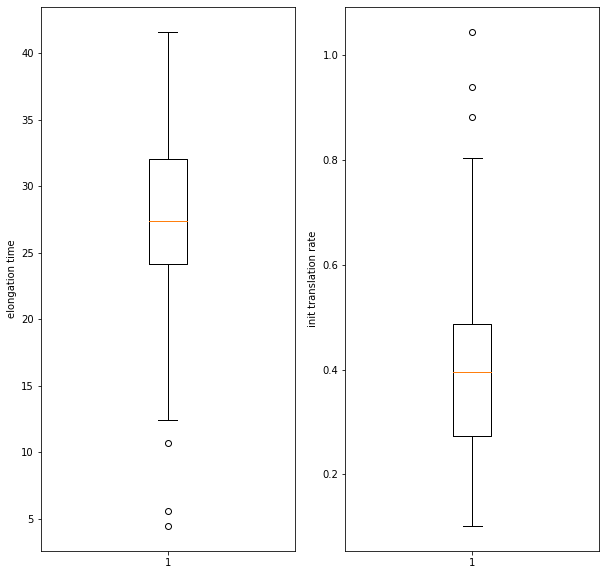

In [46]:
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(ER)
ax[1].boxplot(TI)
ax[0].set_ylabel('elongation time')
ax[1].set_ylabel('init translation rate')
fig.set_size_inches((10,10))
print(np.mean(ER), np.mean(TI))

In [25]:
# test different binding rate


prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
suntag_appearance = 24

fluo_max = 32


translation_rate = 20 #(aa/s)
x = np.arange(prot_length/translation_rate, step=0.1, )
y = translation_rate/translation_rate*x
y[y>fluo_max]=fluo_max

result = pd.DataFrame(columns = ['binding', 'ER', 'TI'])

for binding_rate in np.arange(0.2, 1, 0.3):
    ER = []
    TI = []
    
    for count in range(100):
        # global signal
        x_global = np.arange(2000, step=0.1)
        y_global = np.zeros(len(x_global))

        for i in range(len(x_global)):
            # random number between 0 and 1
            n_rand = np.random.rand() 
            if n_rand < binding_rate:
                if i > (len(x_global)-len(x)):
                    y_global[i:i+len(x)] += y[:len(y_global[i:i+len(x)])]
                else:
                    y_global[i:i+len(x)] += y

        x_global = x_global[500:] - 50
        y_global = y_global[500:]
        y_global -= np.min(y_global)


        PROTEIN_SIZE = prot_length
        DELTA_T = 0.4

        xx = x_global[::4][-3000:-1000]-2600
        yy = y_global[::4][-3000:-1000]

        x_auto, y_auto = autocorrelation(yy, DELTA_T, True)
        if np.isnan(y_auto).any():
            print('')
        else:
            elongation_r, translation_init_r = fit_autocorrelation(x_auto, y_auto, fit_function, protein_size=PROTEIN_SIZE)

            ER.append(elongation_r)
            TI.append(translation_init_r)
            
    d = pd.DataFrame.from_dict({
                                "binding": np.repeat(binding_rate, len(ER)),
                                'ER':ER,
                                'TI':TI, 
                                },
                                   orient='index').T
    result = pd.concat([result, d], ignore_index=True)

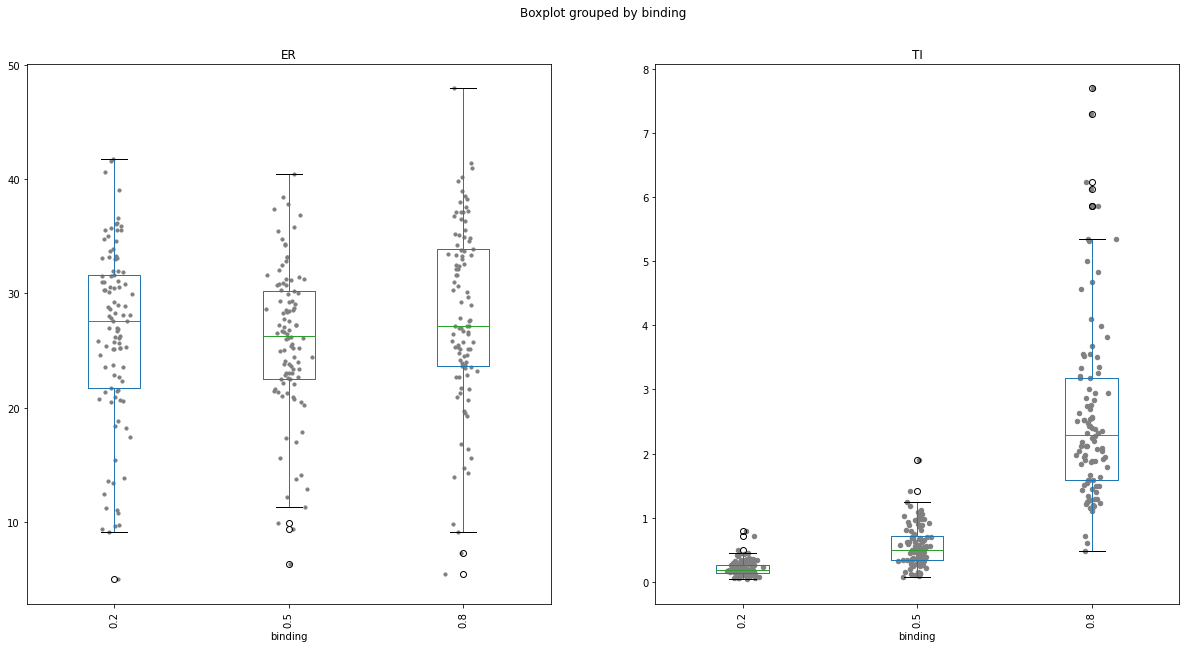

In [26]:
fig, ax = plt.subplots(1,2)
result.boxplot(['ER'] , 
               by='binding', 
               grid=False, 
               ax = ax[0],
               rot=90, 
              )

result.boxplot([ 'TI'] , 
               by='binding', 
               grid=False, 
               ax = ax[1],
               rot=90
               )

group = 'binding'
column = 'ER'
grouped = result.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[0].scatter(x, val, c='grey', alpha=1, s=10)
    
group = 'binding'
column = 'TI'
grouped = result.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[1].scatter(x, val, c='grey', alpha=1, s=20)
    
# ax[1].set_ylim(0,250)
fig.set_size_inches((20,10))

In [27]:
result.groupby(by='binding')[['ER','TI']].mean()

,ER,TI
binding,,
0.2,26.398967,0.216562
0.5,25.875902,0.566653
0.8,28.046929,2.635306
